In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math

%matplotlib inline

In [2]:
img = cv2.imread('images/scenic.jpg')
cv2.imshow('frame', img)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()

In [4]:
pix = img[100, 100] #pixel at 100th row and 100th column
pix

array([195, 199, 204], dtype=uint8)

In [6]:
blue =img[100, 100, 0]
print(blue)

195


In [7]:
#Can modify pixel value the same way
img[100, 100] = [255, 255, 255]
img[100, 100]

array([255, 255, 255], dtype=uint8)

In [8]:
#another way to access pixel values
img.item(10, 10, 2)#value of red layer(BGR)


0

In [9]:
img.itemset((10, 10, 2), 100)
img.item(10, 10, 2)

100

##### Image Properties

In [11]:
print(img.shape)
print(img.size) #total number of pixels
print(img.dtype)

(183, 276, 3)
151524
uint8


### Image Region of Interest

In [28]:
car = img[90:,  60:210]
img[:93, 60:210] = car #copyying the car in another region in the image
cv2.imshow('frame', img)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()

#### Splitting and Merging Image channels

In [29]:
b, g, r = cv2.split(img)
img = cv2.merge((b, g, r))


In [32]:
b = img[:, :, 0] #accessing the blue layer
cv2.imshow('frame', b)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()

>cv2.split() is a costly operation (in terms of time). So do it only if you need it. Otherwise go for Numpy indexing.

##### Making Borders for Images(Padding

You can use cv2.copyMakeBorder() function for creating a border. But it has more applications for convolution operation, zero padding etc. This function takes following arguments:

- src - input image

- top, bottom, left, right - border width in number of pixels in corresponding directions

- borderType - Flag defining what kind of border to be added. It can be following types:
 - cv2.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.
 - cv2.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
 - cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba
 - cv2.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
 - v2.BORDER_WRAP - Can’t explain, it will look like this : cdefgh|abcdefgh|abcdefg
- value - Color of border if border type is cv2.BORDER_CONSTANT

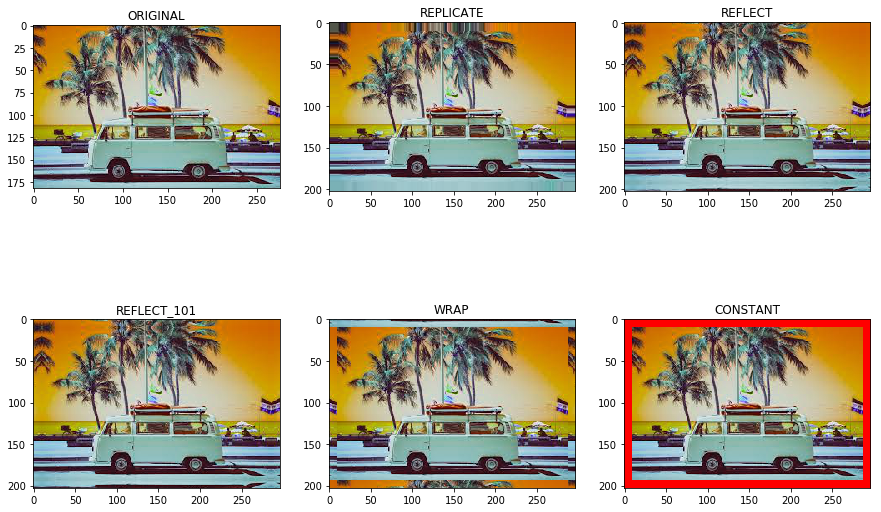

In [5]:
RED = [255,0,0] #RGB here

img1 = cv2.imread('images/scenic.jpg')
plt.subplots(2,2,figsize=(15,10))
replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=RED)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

### Arithmetic Operations

We can add two images using cv2.add() or by numpy operation res = img1 + img2. Both images should be of same depth and type, or seconds image can just be a scalar value.

> There is a difference between OpenCV addition and Numpy addition. OpenCV addition is a saturated operation while Numpy addition is a modulo operation.


In [8]:
x = np.uint8([250])
y = np.uint8([10])

cv2.add(x, y) #This usually provides better result.

array([[255]], dtype=uint8)

In [20]:
img1 = cv2.imread('images/apple.png')
img2= cv2.imread('images/youtube.png')

cv2.imshow('frame', img2 + img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
cv2.imshow('frame', cv2.add(img1, img2))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
x + y

array([4], dtype=uint8)

##### Image Blending

This is also addition but different weights are given to images so that it gives a feeling of blending or transparency. Images are added as per the equation : g(x)=(1−w)f(x)+wf1(x) w => [0, 1]. 

In [13]:
Math(r'g(x) = (1 - w)f(x) + wf1(x)')

<IPython.core.display.Math object>

In [17]:
dst = cv2.addWeighted(img1, 0.3, img2, 0.7, 0)

cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### Bitwise Operations

AND, OR, NOT AND XOR operations. Very useful for extracting any part of image, defining and working with non-rectangular ROI etc. 



In [24]:
#Changing a particular region of an image

rows, cols, channels = img1.shape
roi = img1[0:rows, 0:cols]

# Now create a mask of logo and create its inverse mask also
img1gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img1gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

img2_bg = cv2.bitwise_and(roi, roi, mask = mask_inv)
img1_fg = cv2.bitwise_and(img1, img1, mask = mask)

dst = cv2.add(img2_bg, img1_fg)
img1[:,:] = dst

cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
img2_bg[0, 1, 0]

0

In [37]:
img1_fg[0, 90, 0]

255

In [35]:
dst[0, 90, 0]

255

##### Slide show

In [44]:
val = 0.1
for w in np.arange(0.1, 1, 0.05):
    cv2.imshow('Frame', cv2.addWeighted(img1, w, img2, 1-w, 0))
    cv2.waitKey(100)
cv2.destroyAllWindows()

### Performance and Measurement Improvement Techniques

**cv2.getTickCount** function returns the number of clock-cycles after a reference event on the moment this function is called. So if you this function is called before and after the execution event, you get the number of clock-cycles used to execute a function.

**cv2.getTickFrequency** fucntion returns the frequency of click-cycles, or the number of clock-cycles per second. So to find the time of execution in seconds:

In [49]:
e1 = cv2.getTickCount()
e2 = cv2.getTickCount()
time = (e2 - e1)/cv2.getTickFrequency()
time

1.76 µs ± 185 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [50]:
img1 = cv2.imread('images/tiger.jpg')
e1 = cv2.getTickCount()
for i in range(5, 49, 2):
    img1 = cv2.medianBlur(img1, i)
e2 = cv2.getTickCount()
(e2 - e1)/cv2.getTickFrequency()

0.26718358974358974

##### Default Optimization in OpenCV

Many of the OpenCV functions are optiized using SSE2, AVX etc. It contains unoptimized code also. So if our system supports these features, we should exploit them. It is enabled by default while compiling. So OpenCV runs the optimized code if it is enabled, else it runs the unoptimized code. You can use **cv2.useOptimized()** to check if it is enabled/disabled and **cv2.setUseOptimized()** to enable/disable it

In [51]:
cv2.useOptimized()

True

In [53]:
%%timeit
cv2.medianBlur(img1, 49)

12.8 ms ± 1.58 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [54]:
cv2.setUseOptimized(False)
cv2.useOptimized()

False

In [56]:
%%timeit
cv2.medianBlur(img1, 49)

13 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Optimized meidan filtering is faster.

In [57]:
cv2.setUseOptimized(True)
cv2.useOptimized()

True

> Python scalar operations are faster than Numpy scalar operations. So for operations including one or two elements, python scalar is better than Numpy arrays. Numpy takes advantage when size of array is a little bit bigger.
> OpenCV functions are faster than Numpy functions. So for same operation, OpenCV functions are prefereed. But Numpy works well with views instead of copies. 

##### Performance Optimizing Techniques

1. Avoid using loops in Python as far as possible, especially double/triple loops etc.
2. Vectorize the algorithm/code to the maximum possible extent because Numpy and OpenCV are optimized for vector operations.
3. Exploit the cache coherence.
4. Never make copies of array unless it is needed. Try to use views instead. Array copying is a costly operation. 

**Other Tips**:
- Use fstring for string concatenation instead of string1 + string2 syntax
- Use list comprehension or map function instead of a for loop